# Проект "Исследование объявлений о продаже квартир"

В моем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Мне нужно определить рыночную стоимость объектов недвижимости. Для этого проведу исследовательский анализ данных и установлю параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Изучение данных из файла

In [3]:
# импортируем библиотеки
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
# открываем файл
data = pd.read_csv('/Users/numberone/Documents/Projects/datasets/real_estate_data.csv', sep='\t')

In [5]:
# посмотрим общую информацию
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
# т.к. не все столбцы отображенны в таблице, используем следующий синтаксис, чтобы исправить это
pd.set_option('display.max_columns', None)

In [7]:
# посмотрим первые и последние 10 строк датасета
display(data.head(10),data.tail(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# определим количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
# определим количество явных дубликатов
data.duplicated().sum()

0

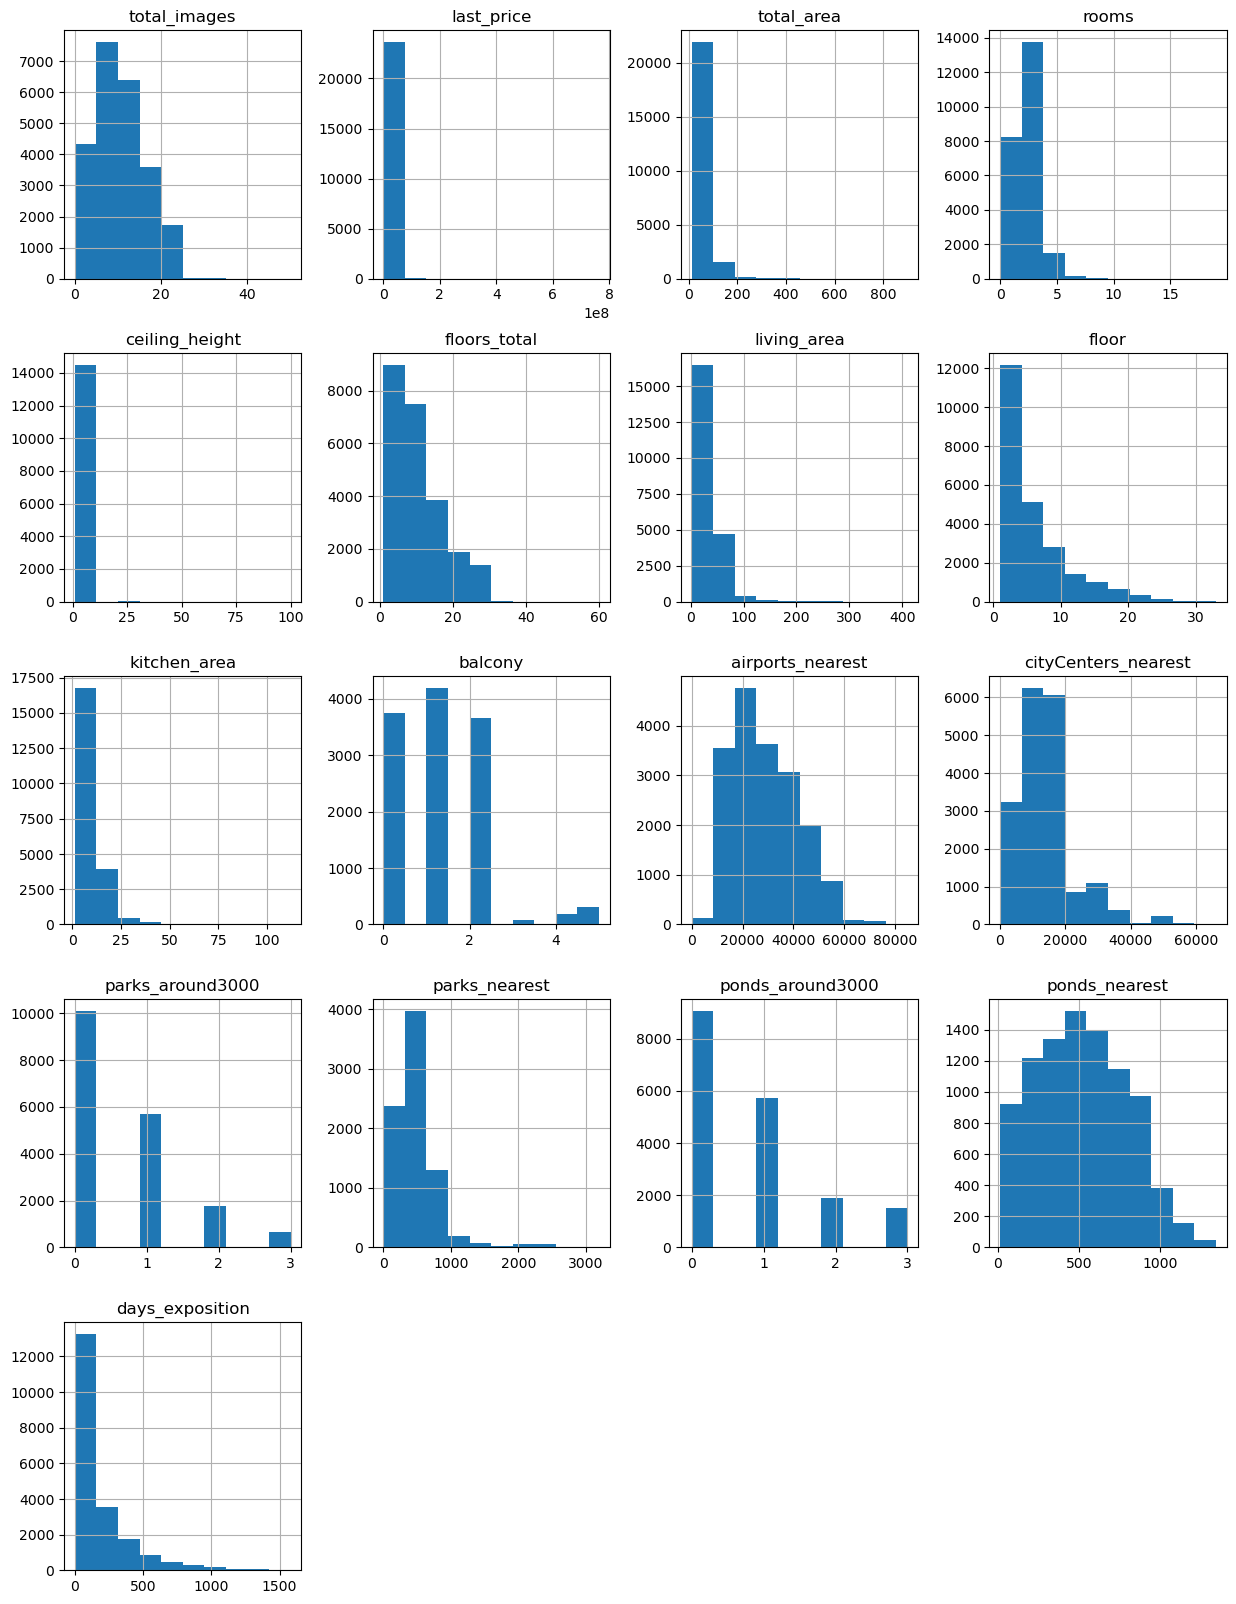

In [10]:
# построим гистограмму для всех числовых столбцов таблицы на одном графике
data.hist(figsize=(15, 20))
plt.show()

**Вывод**
1. Данные столбцы имеют неправильный тип данных:
   - is_apartment (должен содержать значения типа bool);
   - first_day_exposition (должен содержать значения типа datetime);
   - floors_total, balcony, parks_around3000, ponds_around3000 и days_exposition (должны содержать значения типа int64).
2. Видим необычные данные: 
   - min rooms - 0 комнат; 
   - min ceiling_height - 1 метр и max ceiling_height - 100 метров;
   - min last_price - 12190 руб за квадрат.метр (явно не соответствует данному рынку недвижимости);
3. Большое количество пропусков в датасете. Пропуски могут быть связаны с человеческим фактором, то есть пользователь мог не указать конкретный параметр или же могут быть связаны с техническими ошибками.
4. Явных дубликатов не наблюдается.
5. Необходимо переименовать столбцы в соответствии со стилем snake_case: cityCenters_nearest, parks_around3000 и ponds_around3000.

## Предобработка данных

### Переименование столбцов

In [14]:
# переименуем столбцы в соответствии со стилем snake_case
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
data = data.rename(columns={'parks_around3000': 'parks_around_3000'})
data = data.rename(columns={'ponds_around3000': 'ponds_around_3000'})
# проверим
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Обработка пропусков

In [16]:
# еще раз определим количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах есть пропуски.

#### Столбец ceiling_height

Количество пропусков в данном столбце составляет - 9195.

In [20]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [21]:
# заменим пропущенные значения в столбце на медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print('Медианная высота потолков:',data.ceiling_height.median())
print("Кол-во пропусков =", data['ceiling_height'].isna().sum())

Медианная высота потолков: 2.65
Кол-во пропусков = 0


In [22]:
data['ceiling_height'].sort_values(ascending=False).head(30)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
21824     27.0
10773     27.0
5669      26.0
18545     25.0
4643      25.0
9379      25.0
11285     25.0
14382     25.0
355       25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
15743      8.0
17442      8.0
20264      6.0
Name: ceiling_height, dtype: float64

Видим, что данные не корректны, предположим, что неправильно стоит запятая в значениях больше 20 и исправим это.

In [24]:
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10
data['ceiling_height'].describe()

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

In [25]:
# ограничим высоту потолка 7 метрами, все что выше явно не соответствует действительности
data['ceiling_height'] = data.loc[data['ceiling_height'] <= 7, 'ceiling_height'] 
data['ceiling_height'].describe()

count    23692.000000
mean         2.696707
std          0.221734
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

#### Столбец floors_total

In [27]:
# посмотрим общую информацию о столбце
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Согласно пункту 2.2 видим, что количество пропусков в столбце floors_total составляет 86. Это незначительное число, поэтому можно оставить их. Согласно коду выше - максимальное количество этажей составляет - 60, такие данные вполне возможны, тк самое высокое здание в Санкт-Петербурге - Лахта центр с 87 этажами. Т.к. пропуски остались в cтолбце, тип данных не получится изменить на int64.

#### Столбец living_area

Предполагаю, что при заполнении данных, были забыты значения точной жилой площади недвижимости, вследствии чего такое большое количество пропусков - 1903. Данные по этому столбцу нам будут необходимы для исследования, поэтому оставим пропуски.

In [31]:
# посмотрим общую информацию о столбце
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

#### Столбец is_apartment

Количество пропусков в данном столбце - 20924. 
Часто не указывают тип недвижимости, если он просто жилой. В этом столбце булев тип данных, пропуски можно заменить на False.

In [34]:
data['is_apartment'] = data['is_apartment'].fillna(False)
# заменим тип данных на bool
data['is_apartment'] = data['is_apartment'].astype(bool)
# проверим
data.info()
data['is_apartment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23692 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

is_apartment
False    23649
True        50
Name: count, dtype: int64

#### Столбец kitchen_area

Количество пропусков в данном столбце составляет - 2278. Возможно тут такая же ситуация как и с living_area и к примеру у квартир-студий нет отдельной комнаты-кухни, поэтому такие значения можно приравнять к нулю. Также согласно строительным нормам - минимальная площадь кухни должна составлять не менее 5 квадрат.метров.

In [37]:
data.drop(index=data.query('kitchen_area < 5').index,inplace=True)
data.kitchen_area = data.kitchen_area.fillna(0)
# проверим
data['kitchen_area'].describe()

count    23594.000000
mean         9.578548
std          6.424258
min          0.000000
25%          6.400000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

In [38]:
# проверим количество пропусков
data['kitchen_area'].isna().sum()

0

#### Столбец balcony 

Количество пропусков в данном столбце - 11519. Если не указано число балконов, то, скорее всего, в квартире их нет. Такие пропуски можно заменить на число 0. 

In [41]:
data.balcony = data.balcony.fillna(0)
# проверим
data['balcony'].isna().sum()

0

In [42]:
# изменим тип данных на целочисленный
data['balcony'] = data['balcony'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23594 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23594 non-null  int64  
 1   last_price            23594 non-null  float64
 2   total_area            23594 non-null  float64
 3   first_day_exposition  23594 non-null  object 
 4   rooms                 23594 non-null  int64  
 5   ceiling_height        23587 non-null  float64
 6   floors_total          23509 non-null  float64
 7   living_area           21692 non-null  float64
 8   floor                 23594 non-null  int64  
 9   is_apartment          23594 non-null  bool   
 10  studio                23594 non-null  bool   
 11  open_plan             23594 non-null  bool   
 12  kitchen_area          23594 non-null  float64
 13  balcony               23594 non-null  int64  
 14  locality_name         23545 non-null  object 
 15  airports_nearest      18

#### Столбец locality_name

Количество пропусков в данном столбце - 49. Кол-во пропусков мало, на исследование не повлияют, оставим их.

In [45]:
# определим уникальные значения в столбце
print('Количество уникальных значений:', data['locality_name'].nunique())
data['locality_name'].sort_values().unique()

Количество уникальных значений: 363


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [46]:
# заменим поселок на посёлок
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

In [47]:
# заменим однотипные значения
data['locality_name'] = data.locality_name.str.replace('посёлок городского типа', 'посёлок')
data['locality_name'] = data.locality_name.str.replace('городской посёлок', 'посёлок')

In [48]:
# проверим после всех замен
print('Количество уникальных значений:', data['locality_name'].nunique())
data['locality_name'].sort_values().unique()

Количество уникальных значений: 321


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

#### Столбец airports_nearest

Количество пропусков в данном столбце - 5542. Предположительно, такое большое количество пропусков из-за отсутствия аэропопорта в населенном пункте либо в связи с отсутствием информации на картографических данных. Поэтому пропуски оставим.

In [51]:
# посмотрим информацию о столбце
data['airports_nearest'].describe()

count    18088.000000
mean     28798.027643
std      12610.727274
min          0.000000
25%      18601.250000
50%      26737.000000
75%      37273.500000
max      84869.000000
Name: airports_nearest, dtype: float64

#### Столбцы 'city_centers_nearest', 'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest'

В данных столбцах много пропусков и заполнение их средним или медианным значением сильно исказит результат. Вероятно, пропуски возникли в связи с отсутствием информации на картографических данных. Пропуски на исследование не повлияют. Поэтому оставим их. Т.к. пропуски остались в cтолбце parks_around_3000 и ponds_around_3000 - тип данных не получится изменить на int64.

#### Столбец days_exposition

Количество пропусков в данном столбце - 3181. Возможно такое количество пропусков это техническая ошибка или же человечечский фактор ( к примеру продавец не закрыл объявление после продажи недвижимости). Данные этого столбца важны для исследования. Заполнить значения нечем, оставим пропуски, удаление их будет неккоректным. Т.к. пропуски остались в cтолбце - тип данных не получится изменить на int64.

In [56]:
# посмотрим информацию о столбце
data['days_exposition'].describe()

count    20427.000000
mean       180.975033
std        219.762343
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

#### Столбец first_day_exposition

In [58]:
# преобразуем столбец к типу datetime и проверим
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


**Вывод**

Была выполнена предобработка данных, а именно:
- изменили тип данных в столбцах, где это возможно,а именно в is_apartment, first_day_exposition, balcony;
- явных дубликатов не наблюдается;
- переименовали столбцы в соответствии со стилем snake_case: cityCenters_nearest, parks_around3000 и ponds_around3000;
- обработали большое количество пропусков в столбцах (пропуски связаны как с технически, так и с человечским фактором):
    - в ceiling_height пропуски заменили медианным значением
    - в is_apartment пропуски заменили на булев тип данных
    - в kitchen_area, balcony пропуски приравняли к нулю

В остальных столбцах, где были пропуски - оставили не изменными, т.к. логичной замены не было обнаружено.

## Расчёты и добавление результатов в таблицу

Добавим в таблицу новые столбцы со следующими параметрами:
 - цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
 - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
 - месяц публикации объявления;
 - год публикации объявления;
 - тип этажа квартиры (значения — «первый», «последний», «другой»);
 - расстояние до центра города в километрах (переведем из м в км и округлим до ближайших целых значений).

### Цена квадратного метра

In [63]:
# добавим столбец с ценой за 1м²
data['price of one square metre'] = data['last_price'] / data['total_area']

In [64]:
# округлим полученную цену до копеек
data['price of one square metre'] = data['price of one square metre'].round(2)
display(data.head())
data['price of one square metre'].describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price of one square metre
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,0.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


count    2.359400e+04
mean     9.945692e+04
std      5.033554e+04
min      1.118300e+02
25%      7.666667e+04
50%      9.500000e+04
75%      1.142519e+05
max      1.907500e+06
Name: price of one square metre, dtype: float64

### День недели, месяц и год публикации объявления

In [66]:
data['day_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price of one square metre,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,0.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


### Категории этажей

In [68]:
# создадим функцию для категоризации этажности в доме
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis=1)    
display(data.head())
data['floor_category'].value_counts()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price of one square metre,day_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,0.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой


floor_category
другой       17390
последний     3310
первый        2894
Name: count, dtype: int64

### Расстояние до центра города в километрах 

In [70]:
# определим расстояние до центра города в километрах (переведем из м в км)
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price of one square metre,day_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,0.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


**Вывод**
Добавили необходимые столбцы и расчеты по ним. Заметим, что из-за пропусков в исходных данных, в расчетных значениях также есть пропуски.
Cудя по количеству предложений, более актуальны квартиры на любом этаже кроме первого и последнего.





## Исследовательский анализ данных

### Построение гистограмм

#### Общая площадь

In [75]:
data['total_area'].describe()

count    23594.000000
mean        60.454274
std         35.688626
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

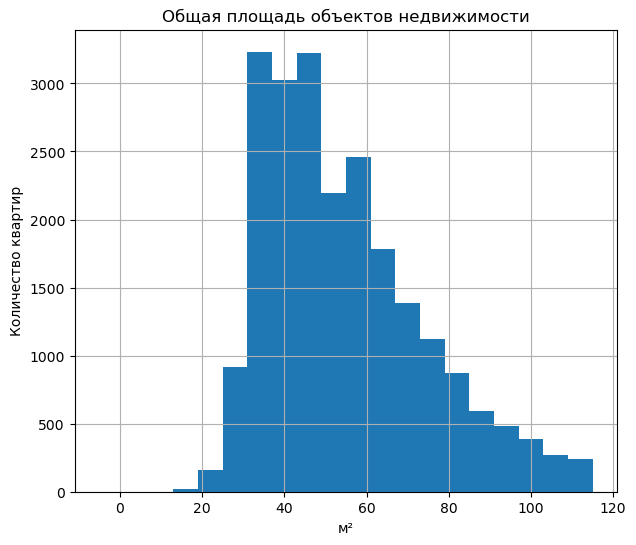

In [76]:
# воспользуемся способом 1.5 * IQR для выявления и удаления выбросов 
# рассчитаем Q1, Q3 и Qqr чтобы построить график без выбросов
q1 = data['total_area'].quantile(.25) # первый квартиль Q1
q3 = data['total_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах iqr
# построим гистограмму 
data['total_area'].hist(bins=20, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(7, 6))
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()

Рассматриваемый диапазон на графике примерно получился до 117 м². Большая часть объектов недвижимости имеют площадь от 30 до 65 м². Площадь объектов более 100 м² встречается редко. С площадью меньше 30 м² также редкость. Среднее значение - 60 м² и медиана 52 м² сдвинуты в сторону больших значений. 

In [78]:
# видим аномальные значения и уберем их (уберем значения больше 400 кв.м)
new_data = data.loc[(data['total_area']<400)]
new_data.reset_index(inplace=True, drop=True)
print(new_data['total_area'].describe())

count    23568.000000
mean        59.973658
std         32.446769
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        399.000000
Name: total_area, dtype: float64


In [79]:
# посчитаем процент удаленных аномальных значений
100 - (new_data['total_area'].shape[0] / data['total_area'].shape[0]) * 100

0.11019750784097937

Количество удаленных аномальных значений составляет - 0,11%, что не превышает 10%, поэтому это сильно не повлияет на наше исследование.

#### Жилая площадь

In [82]:
data['living_area'].describe()

count    21692.000000
mean        34.504983
std         22.063944
min          2.000000
25%         18.600000
50%         30.000000
75%         42.400000
max        409.700000
Name: living_area, dtype: float64

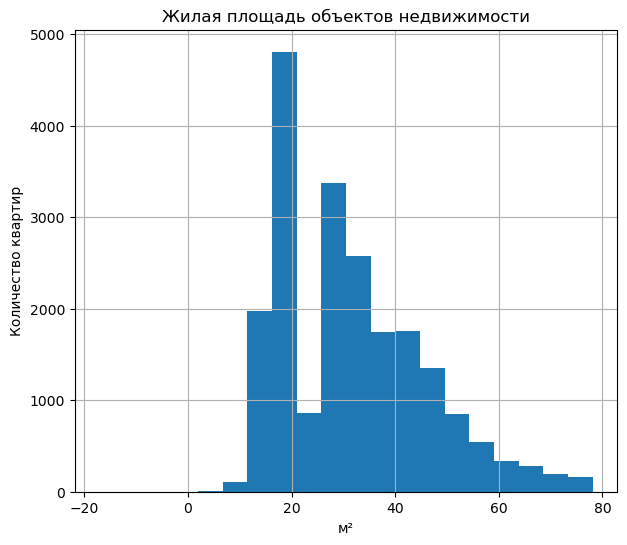

In [83]:
# рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['living_area'].quantile(.25) # первый квартиль Q1
q3 = data['living_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
# построим гистограмму
data['living_area'].hist(bins=20, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(7, 6))
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()

In [84]:
# видим аномальные значения и уберем их (уберем значения больше 300 кв.м)
new_data = data.loc[(data['living_area']<300)]
new_data.reset_index(inplace=True, drop=True)
print(new_data['living_area'].describe())

count    21684.000000
mean        34.391606
std         21.248572
min          2.000000
25%         18.600000
50%         30.000000
75%         42.400000
max        279.600000
Name: living_area, dtype: float64


In [85]:
# посчитаем процент удаленных аномальных значений
100 - (new_data['living_area'].shape[0] / data['living_area'].shape[0]) * 100

8.095278460625593

Рассматриваемый диапазон на графике примерно получился до 78 м². Большая часть объектов недвижимости имеют жилую площадь от 15 до 35 м². Самый распространенный вариант - около 18 м². Жилая площадь объектов более 60 м² встречается редко. С площадью меньше 15 м² также редкость. Среднее значение - 34 м², медиана 30 м². Количество удаленных аномальных значений составляет - 8,1%, что не превышает 10%, поэтому это сильно не повлияет на наше исследование.

#### Площадь кухни

In [88]:
data['kitchen_area'].describe()

count    23594.000000
mean         9.578548
std          6.424258
min          0.000000
25%          6.400000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

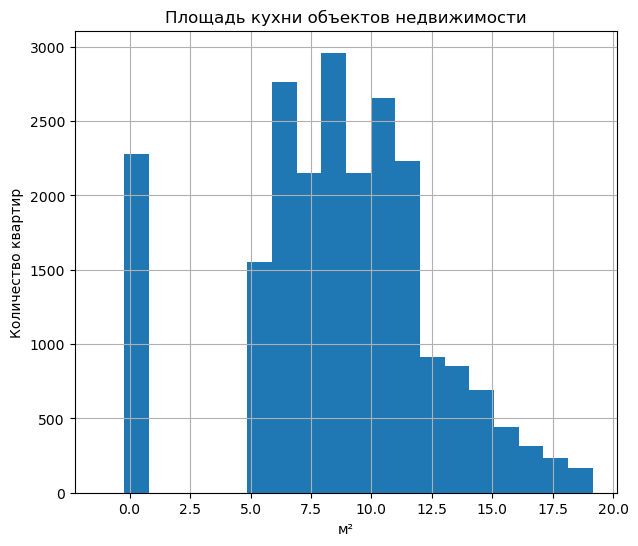

In [89]:
# рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['kitchen_area'].quantile(.25) # первый квартиль Q1
q3 = data['kitchen_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
# построим гистограмму 
data['kitchen_area'].hist(bins=20, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(7, 6))
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('Количество квартир')
plt.show()

Рассматриваемый диапазон на графике примерно получился до 19 м². Большая часть объектов недвижимости имеют площадь кухни от 5,5 до 12 м². Самый распространенный вариант - около 9 м². Площадь кухни более 12 м² встречается редко. Площадь кухни менее 6 м² также редкость. Среднее значение - 10 м², медиана 9 м². У графика также наблюдается небольшой "хвост" из-за редких, но больших значений. "Хвост" с нулевымы значениями - это квартиры-студии.

#### Цена объекта

In [92]:
data['last_price'].describe()

count    2.359400e+04
mean     6.556251e+06
std      1.090819e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

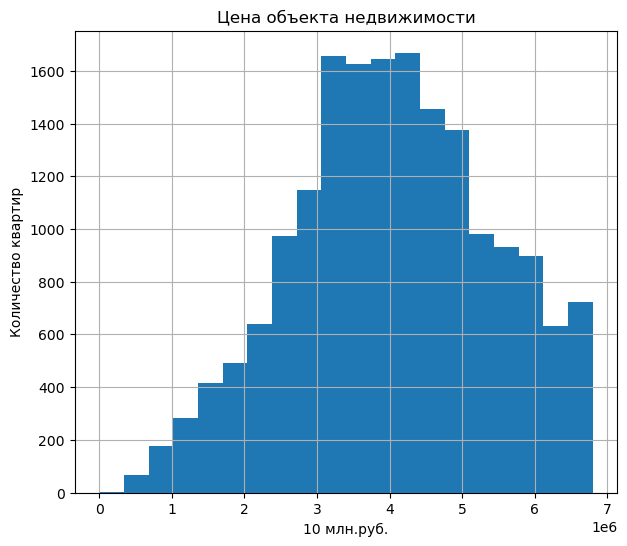

In [93]:
# рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['last_price'].quantile(.25) # первый квартиль Q1
q3 = data['last_price'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
# построим гистограмму
data['last_price'].hist(bins=20, range=(0, (q3 + 1.5 * iqr/1000000)), figsize=(7, 6))
plt.title('Цена объекта недвижимости')
plt.xlabel('10 млн.руб.')
plt.ylabel('Количество квартир')
plt.show()

In [94]:
# видим аномальные значения и уберем их (уберем значения больше 100 млн.)
new_data = data.loc[(data['last_price']<100000000)]
new_data.reset_index(inplace=True, drop=True)
print(new_data['last_price'].describe())

count    2.355700e+04
mean     6.264940e+06
std      6.434206e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.790000e+06
max      9.900000e+07
Name: last_price, dtype: float64


In [95]:
# посчитаем процент удаленных аномальных значений
100 - (new_data['last_price'].shape[0] / data['last_price'].shape[0]) * 100

0.15681953038908603

Количество удаленных аномальных значений составляет - 0,15%, что не превышает 10%, поэтому это сильно не повлияет на наше исследование.

Рассматриваемый диапазон на графике примерно получился до 6,8 млн.руб. Большинство объектов недвижимости имеют цену в пределах от 2,1 до 6,1 млн. руб. Самый распространенный вариант - около 4,2 млн.руб. Среднее значение - 6,2 млн, медиана 4,7 млн. У графика также наблюдается небольшой "хвост" из-за редких, но больших значений.

#### Количество комнат

In [99]:
data['rooms'].describe()

count    23594.000000
mean         2.072434
std          1.079378
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

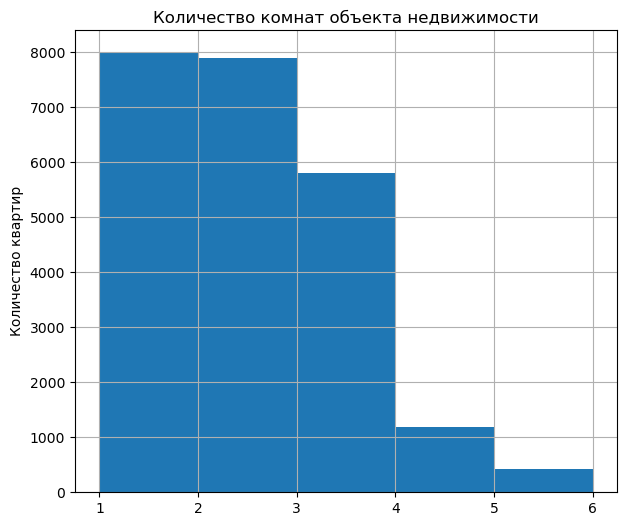

In [100]:
# рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['rooms'].quantile(.25) # первый квартиль Q1
q3 = data['rooms'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
# построим гистограмму
data['rooms'].hist(bins=5, range=(1, (q3 + 1.5 * iqr)), figsize=(7, 6))
plt.title('Количество комнат объекта недвижимости')
plt.ylabel('Количество квартир')
plt.show()

Рассматриваемый диапазон на графике получился до 6 комнат. Большая часть объектов недвижимости имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. Объектов с кол-вом комнат 4 и 5 немного. Среднее и медиана - 2 комнаты. Крайне редкие значения от 6 до 19 комнат не оказывают большого влияния на среднее значение.

In [102]:
# видим аномальные значения и уберем их (уберем значения больше 7 комнат)
new_data = data.loc[(data['rooms']<7)]
new_data.reset_index(inplace=True, drop=True)
print(new_data['rooms'].describe())

count    23504.000000
mean         2.049609
std          1.007527
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


In [103]:
# посчитаем процент удаленных аномальных значений
100 - (new_data['rooms'].shape[0] / data['rooms'].shape[0]) * 100

0.3814529117572363

Количество удаленных аномальных значений составляет - 0,38%, что не превышает 10%, поэтому это сильно не повлияет на наше исследование.

#### Высота потолков

In [106]:
data['ceiling_height'].describe()

count    23587.000000
mean         2.697030
std          0.221931
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

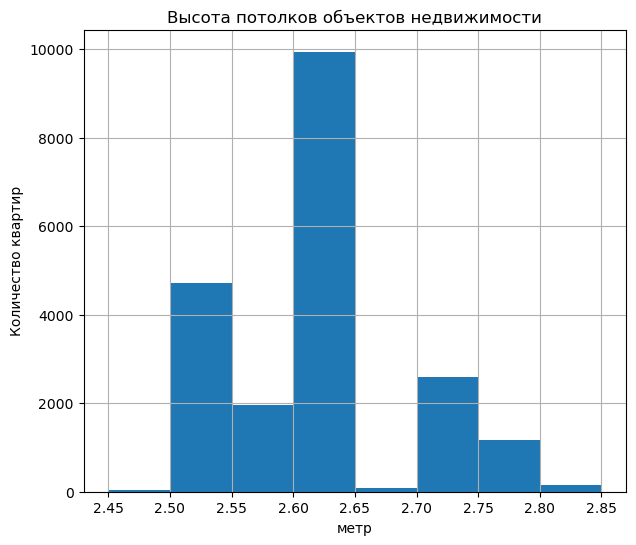

In [107]:
# рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['ceiling_height'].quantile(.25) # первый квартиль Q1
q3 = data['ceiling_height'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
# построим гистограмму
data['ceiling_height'].hist(bins=8, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(7, 6))
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('метр')
plt.ylabel('Количество квартир')
plt.show()

Рассматриваемый диапазон на графике получился до 2,85 м. Большинство объектов недвижимости имеют высоту потолков 2,6 м. Реже представлены варианты от 2,45 м (данная высота допустима к примеру в двухуровневых квартирах в спальне на втором этаже) до 2,6 м и от 2,65 м до 2,85 м. Среднее 2,7 м и медиана 2,65 м.

#### Тип этажа квартиры

In [110]:
data['floor_category'].describe()

count      23594
unique         3
top       другой
freq       17390
Name: floor_category, dtype: object

In [111]:
# посмотрим на кол-во в каждой категории
data['floor_category'].value_counts()

floor_category
другой       17390
последний     3310
первый        2894
Name: count, dtype: int64

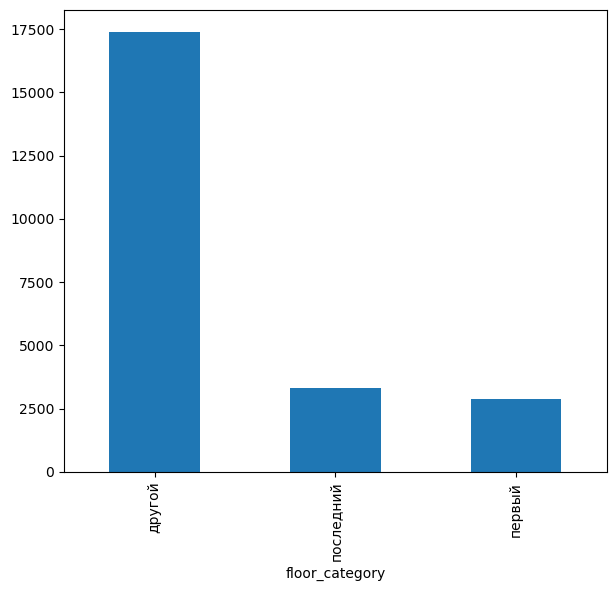

In [112]:
# построим график
data['floor_category'].value_counts().plot.bar(figsize=(7, 6))
plt.show()

Видим, что объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля не столь велика. В основном объекты расположены на этажах между первым и последним.

#### Общее количество этажей в доме

In [115]:
data['floors_total'].describe()

count    23509.000000
mean        10.687184
std          6.594181
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

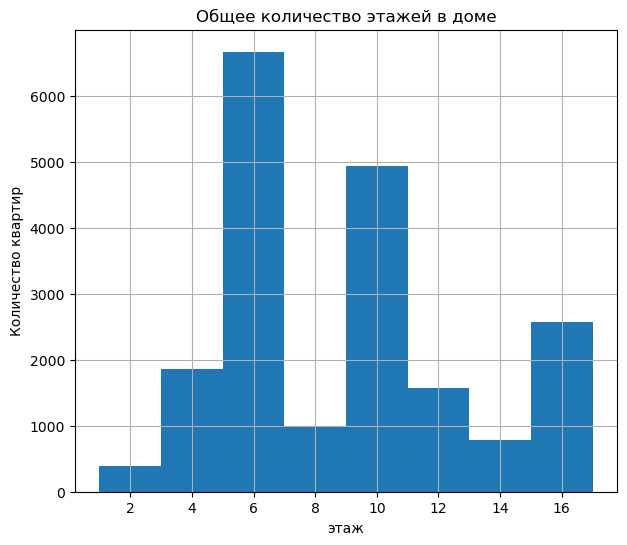

In [116]:
# рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['floor'].quantile(.25) # первый квартиль Q1
q3 = data['floor'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
# построим гистограмму
data['floors_total'].hist(bins=8, range=(1, (q3 + 1.5 * iqr)), figsize=(7, 6))
plt.title('Общее количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('Количество квартир')
plt.show()

Рассматриваемый диапазон с 1 по 17 этаж, исключая некорректные значения и выбросы. Большинство объектов недвижимости - это 5-ти и 6-ти , 9-ти и 10-ти этажки. Остальные варианты представлены реже. Среднее 10 этаж и медиана 9 этаж.

#### Расстояние до центра города в метрах

In [119]:
data['city_centers_nearest'].describe()

count    18111.000000
mean     14175.677323
std       8580.210010
min        181.000000
25%       9234.000000
50%      13094.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

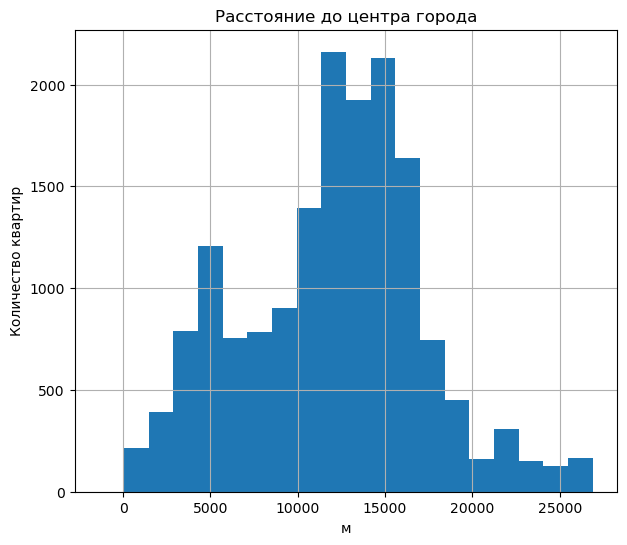

In [120]:
# рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['city_centers_nearest'].quantile(.25) # первый квартиль Q1
q3 = data['city_centers_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
# построим гистограмму 
data['city_centers_nearest'].hist(bins=20, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(7, 6))
plt.title('Расстояние до центра города')
plt.xlabel('м')
plt.ylabel('Количество квартир')
plt.show()

Рассматриваемый диапазон до 27500 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены на удалении 12-15 км от центра. Остальные варианты представлены реже. Среднее 14 км и медиана 13 км.

#### Расстояние до ближайшего парка

In [123]:
data['parks_nearest'].describe()

count    8059.000000
mean      490.944286
std       342.664283
min         1.000000
25%       287.500000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

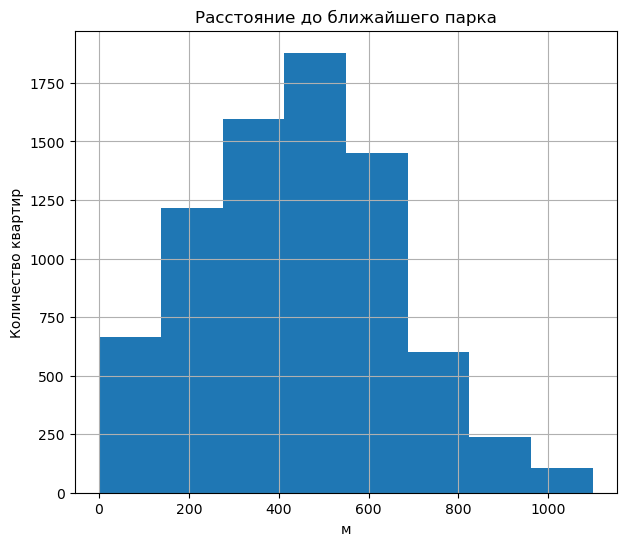

In [124]:
# рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['parks_nearest'].quantile(.25) # первый квартиль Q1
q3 = data['parks_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
# построим гистограмму 
data['parks_nearest'].hist(bins=8, range=(1, (q3 + 1.5 * iqr)), figsize=(7, 6))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('м')
plt.ylabel('Количество квартир')
plt.show()

Рассматриваемый диапазон до 1150 м. Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии примерно 400-590м. Ближайшие к парку объект примерно на расстоянии 500м. Среднее 490м и медиана 455м.

**Вывод**   
Мы получили представление о типичном объекте недвижимости: квартира с 1 или 2 комнатами, 5, 6, 9 или 10-ти этажка (редко с первым или последним этажом), общей площадью около 30-65 м², жилой площадью от 15 до 35 м², площадью кухни около 5,5 - 12 м², с высотой потолков 2,6 м, стоимостью от 2,1 - 6,1 млн.руб, расположенной на удалении от центра на расстоянии 12000-15000 метров, до ближайшего парка около 400-590 метров.

### Быстрота продажи квартиры

In [128]:
new_data['days_exposition'].describe()

count    20366.000000
mean       180.707257
std        219.474475
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

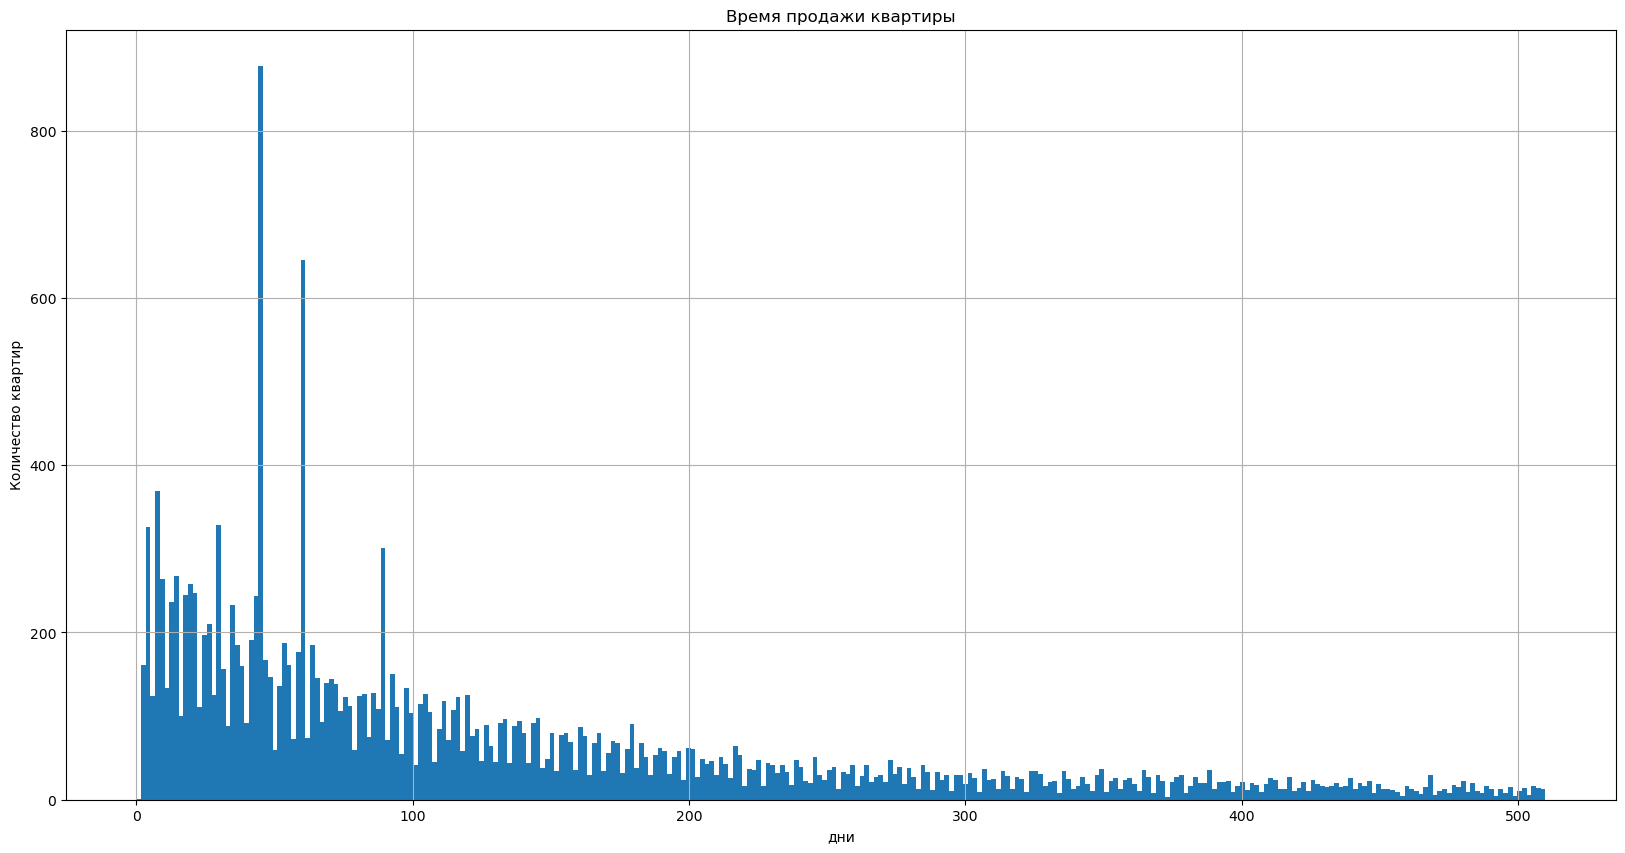

In [129]:
# рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = new_data['days_exposition'].quantile(.25) # первый квартиль Q1
q3 = new_data['days_exposition'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
# построим гистограмму 
new_data['days_exposition'].hist(bins=300, range=(0, (q3 + 1.5 * iqr)), figsize=(20, 10))
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('Количество квартир')
plt.show()

Согласно графику видим, что чаще продаются квартиры примерно за 45 и 60 дней. Необходимо помнить, что возможно квартира не продана, но объявление автоматически могло быть закрыто в связи с истекшим сроком выставления на продажу. Также квартиру могли продать и забыть снять оъявление с продажи.
Среднее время продажи 181 день, медианное - 95 дней. Быстрая продажа за 1 день, долгая продажа - 1580 дней. 
На графике можно увидеть длиный "хвост". Больших значений достаточно много. Среднее значение почти в 2 раза больше медианного. Стандартное отклонение превышает среднее значение - это говорит о большом кол-ве выбросов, поэтому построим диаграмму размаха.

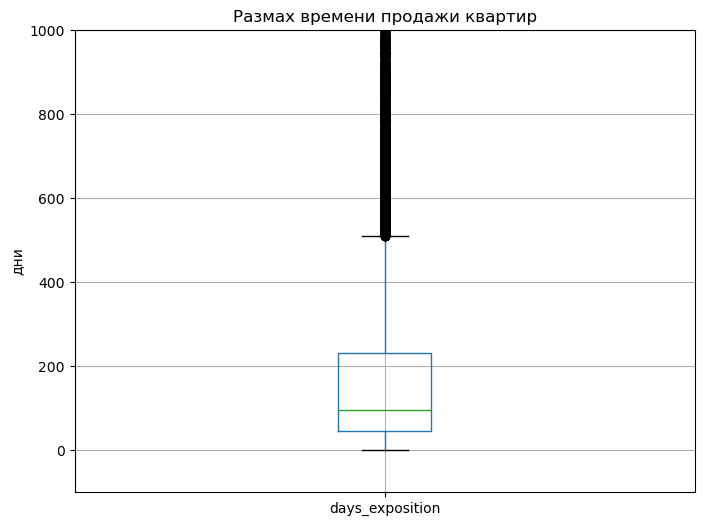

In [131]:
# строим диаграмму размаха времени продажи квартир
new_data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи квартир')
plt.ylim(-100, 1000)
plt.ylabel('дни')
plt.show()

In [132]:
# найдем выбросы
q3 + 1.5 * iqr

510.0

In [133]:
# определим длину датафрейма
len(new_data)

23504

In [134]:
# уберем выбросы
data_update = new_data.query('days_exposition < 510')
# проверим длину датафрейма
len(data_update)

18699

**Вывод**
Убрали из нашего датафрейма 4805 строк, которые содержали выбросы по времени продажи. Продажи больше 510 дней - это выбросы. Поэтому максимальное время продажи - 510 дней.

### Факторы, которые больше всего влияют на общую стоимость объекта

Построим графики, которые покажут зависимость цены от параметров:
- общей площади
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

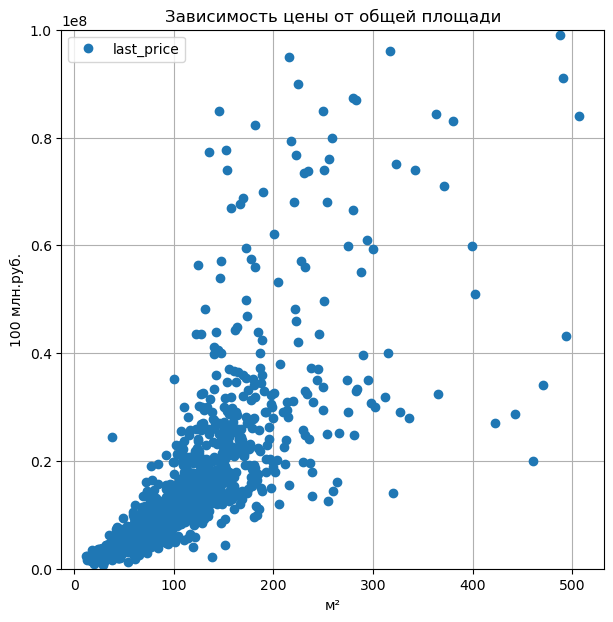

In [138]:
# создаем сводную таблицу и выводим
(
    new_data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(7, 7))
)
plt.title('Зависимость цены от общей площади')
plt.xlabel('м²')
plt.ylabel('100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

На графике видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью до 150 кв.м. Зависимость прямопропорциональная - чем больше площадь квартиры, тем выше цена.

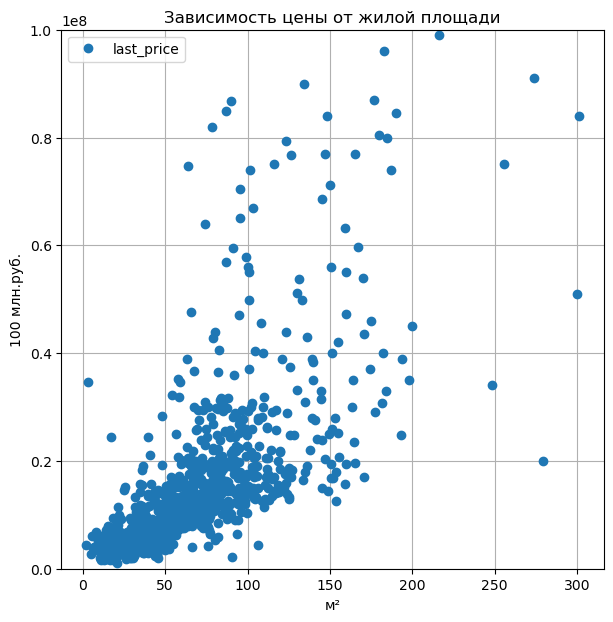

In [140]:
# создаем сводную таблицу и выводим
(
    new_data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(7, 7))
)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('м²')
plt.ylabel('100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

На графике видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и жилой площадью до 80 м². Зависимость прямопропорциональная - чем больше жилая площадь квартиры, тем выше ее стоимость.

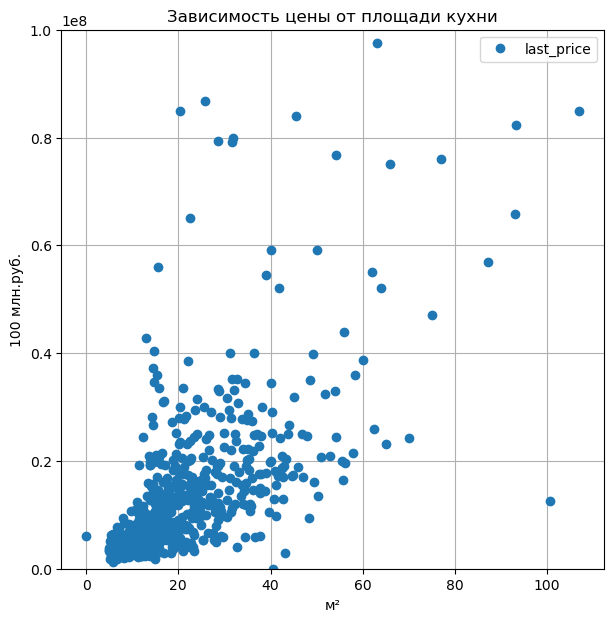

In [142]:
# создаем сводную таблицу и выводим
(
    new_data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(7, 7))
)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('м²')
plt.ylabel('100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

На графике видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью кухни до 22 м². Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость.

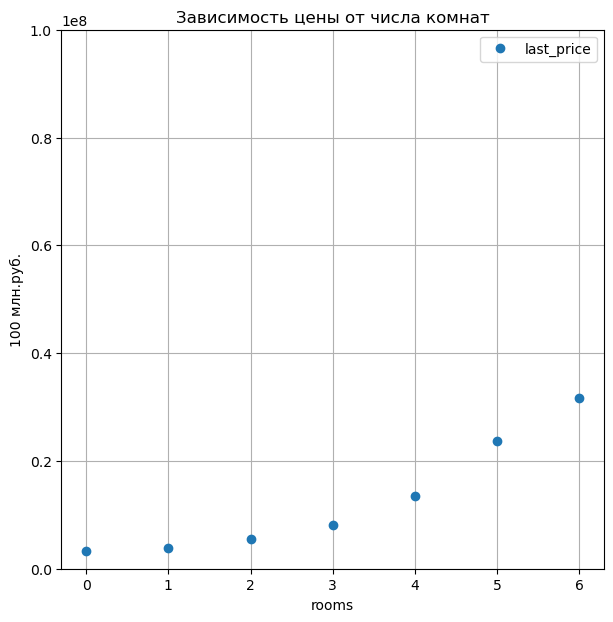

In [144]:
# создаем сводную таблицу и выводим
(
    new_data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o', figsize=(7, 7))
)
plt.title('Зависимость цены от числа комнат')
plt.ylabel('100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

На графике видно, что больше всего данных для квартир стоимостью до 40 млн. руб и кол-вом комнат от 1 до 6. Для этого диапазона: с увеличение числа комнат до 6 комнат стоимость квартир растет.

,mean,count,median
floor_category,,,
другой,6.139072e+06,13956,4650000.0
первый,4.392313e+06,2220,3799500.0
последний,6.242404e+06,2523,4200000.0


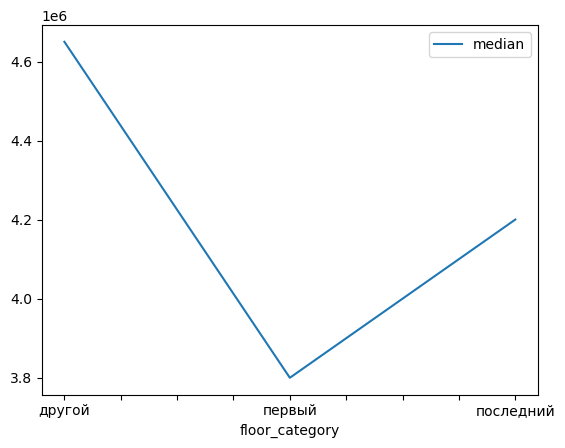

In [146]:
# создаем сводную таблицу
pivot_table_floor_category = data_update.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# присваиваем названия колонкам
pivot_table_floor_category.columns = ['mean', 'count', 'median']
#строим зависимость
pivot_table_floor_category.plot(y = 'median', legend=True)
#выводим
pivot_table_floor_category

На графике видно, что медианное значение для квартир на первом этаже минимальное. Максимальное медианное значение стоимости квартир - для квартир отличных от первого и последнего этажа.

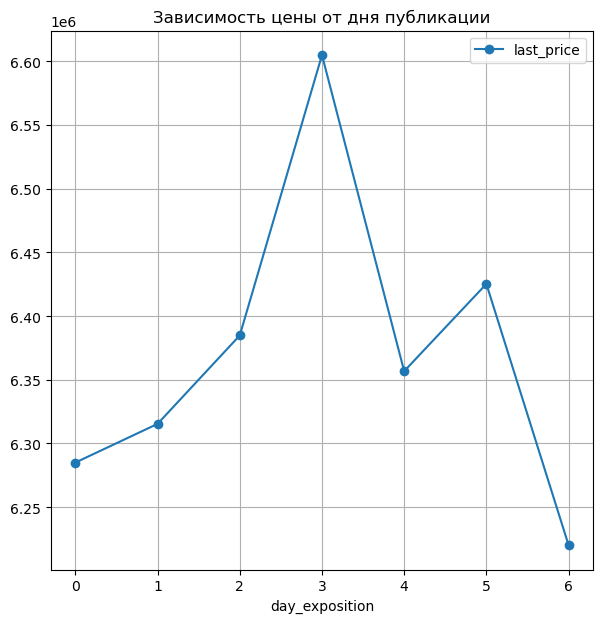

In [148]:
# построим зависисмость цены от дня публикации
(
    new_data.pivot_table(index='day_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.title('Зависимость цены от дня публикации')
plt.show()

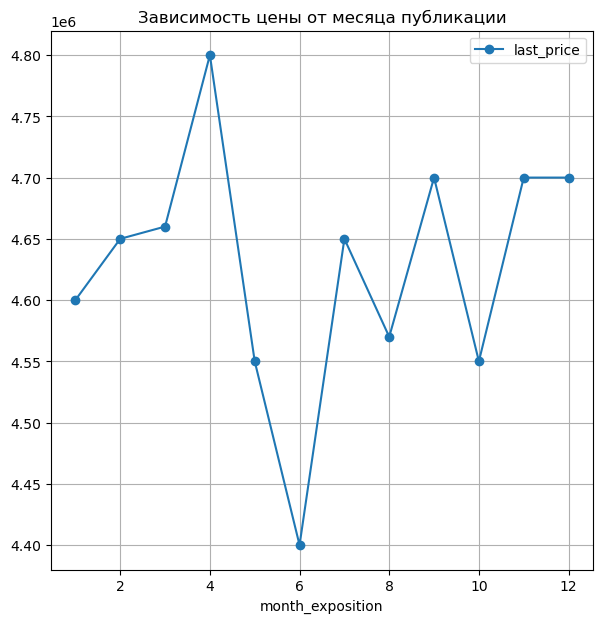

In [149]:
# построим зависисмость цены от месяца публикации
(
    new_data.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.title('Зависимость цены от месяца публикации')
plt.show()

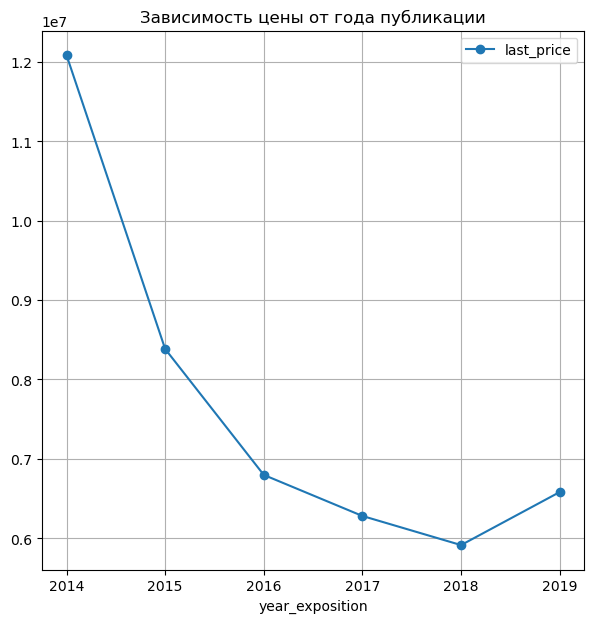

In [150]:
# построим зависисмость цены от года публикации
(
    new_data.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.title('Зависимость цены от года публикации')
plt.show()

Нет чёткой зависимости стоимости квартир от дня недели, месяца и года. 

**Вывод**
На общую стоимость объекта недвижимости больше всего влияет общая площадь квартиры и этаж расположения квартиры. Чем больше площадь, тем выше стоимость. На первом и последнем этажах стоимость квартиры меньше, чем на остальных. Дата публикации объявления на стоимость не влияет.

### Изучим 10 населённых пунктов с наибольшим числом объявлений

In [154]:
# определим топ-10 населенных пунктов с наибольшим числом объявлений и узнаем их среднюю стоимость за квадратный метр
top10 = new_data.groupby('locality_name')['price of one square metre'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
top10.columns = ['count', 'price of one square metre']
top10.reset_index(inplace=True)
top10

,locality_name,count,price of one square metre
0,Санкт-Петербург,15584,114581.611561
1,посёлок Мурино,552,85577.050634
2,посёлок Шушары,438,78513.334018
3,Всеволожск,398,68654.473970
4,Пушкин,365,103163.249068
5,Колпино,337,75333.295816
6,посёлок Парголово,326,90332.262638
7,Гатчина,302,68846.422119
8,деревня Кудрово,299,92473.547559
9,Выборг,236,58188.871568


In [155]:
# выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра
print('Населённый пункт с cамой высокой стоимостью кв.м жилья')
print(top10.loc[top10['price of one square metre']==top10['price of one square metre'].max()])
print('________________________________________________________')
print('Населённый пункт с cамой низкой стоимостью кв.м жилья')
print(top10.loc[top10['price of one square metre']==top10['price of one square metre'].min()])

Населённый пункт с cамой высокой стоимостью кв.м жилья
     locality_name  count  price of one square metre
0  Санкт-Петербург  15584              114581.611561
________________________________________________________
Населённый пункт с cамой низкой стоимостью кв.м жилья
  locality_name  count  price of one square metre
9        Выборг    236               58188.871568


### Cредняя стоимость квартир на разном удалении от центра

In [157]:
# выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра
data_spb = data_update.query('locality_name == "Санкт-Петербург"')
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price of one square metre,day_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,0.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0
15,16,4650000.0,39.0,2017-11-18,1,2.65,14.0,20.5,5,False,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0,119230.77,5,11,2017,другой,14.0


In [158]:
# посмотрим длину получившегося data_spb
len(data_spb)

12376

Получили 12383 объявлений из Санкт-Петербурга. Определим центр с помощью стоимости квадратного метра. Построим график и определим точку, после которой пойдет спад в стоимости - это и будет граница центра города.

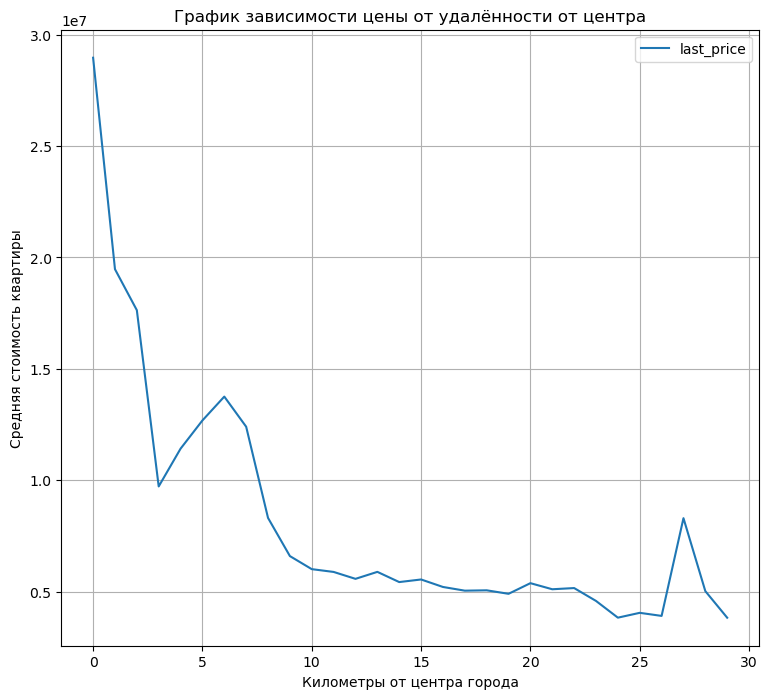

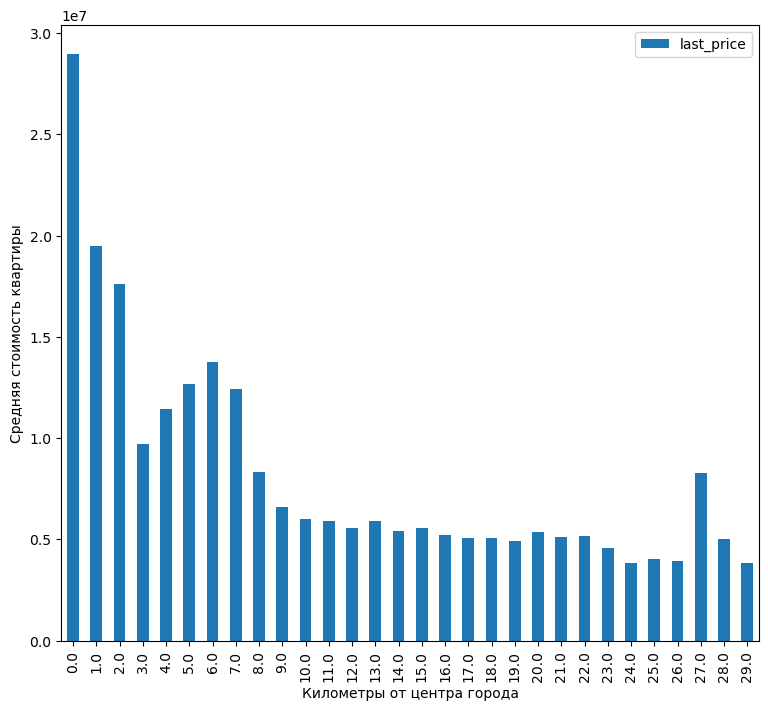

In [160]:
data_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean') \
   .plot(figsize=(9,8), grid=True, title='График зависимости цены от удалённости от центра')
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость квартиры')
plt.show()

data_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean') \
   .plot(kind='bar', figsize=(9,8))
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость квартиры')
plt.show()

Видим, что значительное падение цены на графике происходит при достижении значения в 6-7 км, получается, что центральным районом можно считать все квартиры в удалении от центра не более чем на 7 км.

## Общий вывод

На общую стоимость объекта недвижимости больше всего влияет общая площадь квартиры и этаж расположения квартиры. Чем больше площадь, тем выше стоимость. На первом и последнем этажах стоимость квартиры меньше, чем на остальных. Дата публикации объявления на стоимость не влияет. На стоимость квартиры также влияет расстояние до центра города. Чем ближе квартира располагается к центру, тем выше ее стоимость. По результатам исследования приняли, что зона центра города распространяется на 7 км.

Мы получили представление о типичном объекте недвижимости: квартира с 1 или 2 комнатами, 5, 6, 9 или 10-ти этажка (редко с первым или последним этажом), общей площадью около 30-65 м², жилой площадью от 15 до 35 м², площадью кухни около 5,5 - 12 м², с высотой потолков 2,6 м, стоимостью от 2,1 - 6,1 млн.руб, расположенной на удалении от центра на расстоянии 12000-15000 метров, до ближайшего парка около 400-590 метров.

Также установлено:

Среднее время продажи объекта недвижимости - 181 день, чаще продаются квартиры примерно за 45 и 60 дней.
Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге - 114581 руб./м² (топ-10 населенных пунктов по количеству объявлений).
Самая низкая средняя стоимость квадратного метра в Выборге - 58189 руб./м² (топ-10 населенных пунктов по количеству объявлений).

Чек-лист выполнения проекта:

- открыт файл
- файлы изучены (выведены первые строки, метод info(), гистограммы и т.д.)
- определены пропущенные значения
- заполнены пропущенные значения там, где это возможно
- есть пояснение, какие пропущенные значения обнаружены
- изменены типы данных
- есть пояснение, в каких столбцах изменены типы и почему
- устранены неявные дубликаты в названиях населённых пунктов
- устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- посчитано и добавлено в таблицу: цена одного квадратного метра
- посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- посчитано и добавлено в таблицу: месяц публикации объявления
- посчитано и добавлено в таблицу: год публикации объявления
- посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- посчитано и добавлено в таблицу: расстояние в км до центра города
- изучены и описаны следующие параметры: - общая площадь; - жилая площадь; - площадь кухни; - цена объекта; - количество комнат; - высота потолков; - этаж квартиры; - тип этажа квартиры («первый», «последний», «другой»); - общее количество этажей в доме; - расстояние до центра города в метрах; - расстояние до ближайшего аэропорта; - расстояние до ближайшего парка; - день и месяц публикации объявления
- построены гистограммы для каждого параметра
- выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы." - общей площади; - жилой площади; - площади кухни; - количество комнат; - типа этажа, на котором расположена квартира (первый, последний, другой); - даты размещения (день недели, месяц, год);
- выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."
- выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- в каждом этапе есть промежуточные выводы
- есть общий вывод